1. Qual a média do preço de compra dos
imóveis por “Nível”?
- Nível 0 -> Preço entre R$ 0 e R$
321.950
- Nível 1 -> Preço entre R$ 321.950 e
R$ 450.000
- Nível 2 -> Preço entre R$ 450.000 e
R$ 645.000
- Nível 3 -> Acima de R$ 645.000

2. Qual a média do tamanho da sala de
estar dos imóveis por “Size” ?
- Size 0 -> Tamanho entre 0 e 1427
sqft
- Size 1 -> Tamanho entre 1427 e 1910 sqft
- Size 2 -> Tamanho entre 1910 e
2550 sqft
- Size 3 -> Tamanho acima de 2550
sqft

3. Adicione as seguinte informações ao
conjunto de dados original:
- Place ID: Identificação da
localização
- OSM Type: Open Street Map type
- Country: Nome do País
- Country Code: Código do País

4. Adicione os seguinte filtros no Mapa:
- Tamanho mínimo da área da sala
de estar.
- Número mínimo de banheiros.
- Valor Máximo do Preço.
- Tamanho máximo da área do
porão.
- Filtro das Condições do Imóvel.
- Filtro por Ano de Construção.

5. Adicione os seguinte filtros no
Dashboard:

- Filtro por data disponível para
compra.
- Filtro por ano de renovação.
- Filtro se possui vista para a água
ou não.

In [1]:
import pandas as pd
import ipywidgets as widgets
import matplotlib as plt
from matplotlib import gridspec
from ipywidgets import fixed
from matplotlib import pyplot as plt

Qual a média do preço de compra dos imóveis por “Nível”?
Nível 0 -> Preço entre R 0𝑒𝑅 
321.950

Nível 1 -> Preço entre R 321.950𝑒𝑅  450.000
Nível 2 -> Preço entre R 450.000𝑒𝑅  645.000
Nível 3 -> Acima de R$ 645.000

In [2]:
df = pd.read_csv('./kc_house_data.csv')

In [3]:
df.sample()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
4083,1156000100,20141224T000000,246700.0,3,2.0,1610,13309,1.0,0,0,...,7,1610,0,1967,0,98042,47.3398,-122.133,1610,15725


In [4]:
df['nivel'] = df['price'].apply(lambda x: 0 if x< 321950 else 1 if (x>= 321950) & (x< 450000) else 
                                2 if (x>= 450000) & (x<645000) else 3)



In [5]:
df[['nivel','price']].groupby('nivel').mean().reset_index(drop=True)

,price
0,251544.621507
1,383585.205332
2,536164.422840
3,985008.983189


Qual a média do tamanho da sala de estar dos imóveis por “Size” ?
Size 0 -> Tamanho entre 0 e 1427 sqft
Size 1 -> Tamanho entre 1427 e 1910 sqft
Size 2 -> Tamanho entre 1910 e 2550 sqft
Size 3 -> Tamanho acima de 2550 sqft

In [18]:
df['size'] = df['sqft_living'].apply(lambda x: 0 if x<= 1427 else 1 if (x> 1427) & (x<= 1910) else
                                    2 if (x> 1910) & (x<= 2550) else 3)


df[['size','sqft_living']].groupby('size').mean().reset_index(drop=True)

,sqft_living
0,1123.832531
1,1664.962334
2,2211.792786
3,3329.607016


Adicione as seguinte informações ao conjunto de dados original:
Place ID: Identificação da localização
OSM Type: Open Street Map type
Country: Nome do País
Country Code: Código do País

In [17]:
#achar uma bibiotca que ache essas informações: No caso o geopy
from geopy.geocoders import Nominatim

#inicializando a requisição API

df['place'] = 'NA'
df['osm_type'] = 'NA'
df['country'] = 'NA'
df['country_code'] = 'NA'

geolocator = Nominatim(user_agent= 'geoapiExercises')


for i in range(len(df)):
    query = str(df.loc[i,'lat']) + ',' + str(df.loc[i,'long'])
    
    response = geolocator.reverse(query)
    
    if 'osm_type' in response.raw['osm_type']:
        df.loc[i,'osm_type']= response.raw['osm_type'].dtypes(int)







GeocoderUnavailable: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=47.6168&lon=-122.045&format=json&addressdetails=1 (Caused by ConnectTimeoutError(<urllib3.connection.VerifiedHTTPSConnection object at 0x7f52f4ca18b0>, 'Connection to nominatim.openstreetmap.org timed out. (connect timeout=1)'))

4. Adicione os seguinte filtros no Mapa: 
    Tamanho mínimo da área da sala de estar.
    Número mínimo de banheiros.
    Valor Máximo do Preço.
    Tamanho máximo da área do porão.
    Filtro das Condições do Imóvel.
    Filtro por Ano de Construção


In [28]:
df.sample()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
13420,7236300065,20140718T000000,275000.0,3,1.5,1320,7695,1.0,0,0,...,7,1320,0,1959,0,98056,47.4908,-122.181,1370,8295


In [47]:
#carregando os dados
df= pd.read_csv('./kc_house_data.csv')


#conventendo os dados:

df['date']= pd.to_datetime(df['date'])

df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21608   2014-05-21
21609   2015-02-23
21610   2014-06-23
21611   2015-01-16
21612   2014-10-15
Name: date, Length: 21613, dtype: datetime64[ns]

In [3]:
df['yr_built']= pd.to_datetime(df['yr_built'],format= '%Y')

df['yr_built'].max()

Timestamp('2015-01-01 00:00:00')

In [9]:
sala= widgets.FloatSlider(
        value=7540,
        min=290,
        max=13540,
        step=10,
        description='Test:',
        disabled=False,
        continuous_update=False,
        orientation='horizontal',
        readout=True,
        readout_format='.1f',)
sala

FloatSlider(value=7540.0, continuous_update=False, description='Test:', max=13540.0, min=290.0, readout_format…

In [5]:
precos= widgets.BoundedIntText(
        value=754525,
        min=75000,
        max=7700000,
        step=500,
        description='Preços:',
        disabled=False)
precos

BoundedIntText(value=754525, description='Preços:', max=7700000, min=75000, step=500)

In [6]:
banheiros= widgets.IntSlider(
        value=4,
        min=0,
        max=8,
        step=1,
        description='Banheiros:',
        disabled=False,
        continuous_update=False,
        orientation='horizontal',
        readout=True,
        readout_format='d')

banheiros

IntSlider(value=4, continuous_update=False, description='Banheiros:', max=8)

In [10]:
construido= widgets.IntSlider(
            value=1965,
            min=1900,
            max=2015,
            step=1,
            description='Test:',
            disabled=False,
            continuous_update=False,
            orientation='vertical',
            readout=True,
            readout_format='d')
construido

IntSlider(value=1965, continuous_update=False, description='Test:', max=2015, min=1900, orientation='vertical'…

In [11]:
condicao= widgets.Dropdown(
        options=[('One',1), ('Two', 2), ('Three', 3),('Four', 4),('Five', 5)],
        value=3,
        description='Number:',)
condicao

Dropdown(description='Number:', index=2, options=(('One', 1), ('Two', 2), ('Three', 3), ('Four', 4), ('Five', …

5. Adicione os seguinte filtros no Dashboard:
    Filtro por data disponível para compra.
    Filtro por ano de renovação.
    Filtro se possui vista para a água ou não.

In [48]:
df['date'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m-%d')
df['ano'] = pd.to_datetime(df['date']).dt.strftime('%Y')
df['semana_ano']= pd.to_datetime(df['date']).dt.strftime('%Y-%U')

len(df['ano'])

21613

In [23]:

date_disponivel

SelectionSlider(continuous_update=False, description='Disponível', options=('2014-05-02', '2014-05-03', '2014-…

In [49]:
data_disponivel= widgets.SelectionSlider(options= df['date'].sort_values().unique().tolist(),
                     values= '2014-12-01',
                      description= 'Disponível',
                      disable=False,
                      continuous_update=False,
                     orientation= 'horizontal',
                     readout=True)


def atualizar_dash(limit,df):
    
    df = df[df['date']>= limit].copy()
    
    fig = plt.figure(figsize=(24,12))

    spec= gridspec.GridSpec(nrows=2, ncols=2, figure=fig)

    ax1= fig.add_subplot(spec[0,:])
    ax2= fig.add_subplot(spec[1,0])
    ax3= fig.add_subplot(spec[1,1])

    anual=  df[['ano','id']].groupby('ano').sum().reset_index()
    ax1.bar(anual['ano'],anual['id'])

    diario= df[['date','id']].groupby('date').mean().reset_index()
    ax2.bar(diario['date'],diario['id'])

    ano_semana = df[['semana_ano','id']].groupby('semana_ano').mean().reset_index()
    ax3.plot(ano_semana['semana_ano'], ano_semana['semana_ano'])

    plt.xticks(rotation=60);


 


In [50]:
widgets.interactive(atualizar_dash, df=fixed(df),limit= data_disponivel)

interactive(children=(SelectionSlider(continuous_update=False, description='Disponível', options=('2014-05-02'…

# Filtro por ano de renovação

In [6]:
df['yr_renovated']= df['yr_renovated'].apply( lambda x: pd.to_datetime('1970-01-01',format= '%Y-%m-%d') if 0== x
                                             else pd.to_datetime(x,format= '%Y'))



In [67]:
renovacao_year= pd.to_datetime(df['yr_renovated']).dt.strftime('%Y')
renovacao_week= pd.to_datetime(df['yr_renovated']).dt.strftime('%Y-%U')
renovacao_day = pd.to_datetime(df['yr_renovated']).dt.strftime('%Y--%m-%d')



In [70]:



#construindo o botão
renovado= widgets.SelectionSlider(options= df['date'].sort_values().unique().tolist(),
                             values= '1951-01-01',
                              description= 'Data de Renovação',
                              disable=False,
                              continuous_update=False,
                             orientation= 'vertical',
                             readout=True)


#função de atualizar dash
def update_renovacao(limit,df):
    
    data_limit = df[df['date']>= limit].copy()
    
    #criando dashboard:
    fig = plt.figure(figsize=(24,12))

    spec= gridspec.GridSpec(nrows=2, ncols=2, figure=fig)


    ax1= fig.add_subplot(spec[0,:])
    ax2= fig.add_subplot(spec[1,0])
    ax3= fig.add_subplot(spec[1,1])


    #ano_renovacao= df[['renovacao_year','id']].groupby('renovacao_year').sum().reset_index()
    #ax1.bar(ano_renovacao['renovacao_year'], ano_renovacao['id'])

    dia_renovacao= df[['renovacao_day','id']].groupby('renovacao_day').sum().reset_index()
    ax2.bar(dia_renovacao['renovacao_day'],dia_renovacao['id'])

    semana_renovacao= df[['renovacao_week','id']].groupby('renovacao_week').sum().reset_index()
    ax3.bar(semana_renovacao['renovacao_week'],semana_renovacao['id'])



interactive(children=(SelectionSlider(continuous_update=False, description='Data de Renovação', options=('2014…

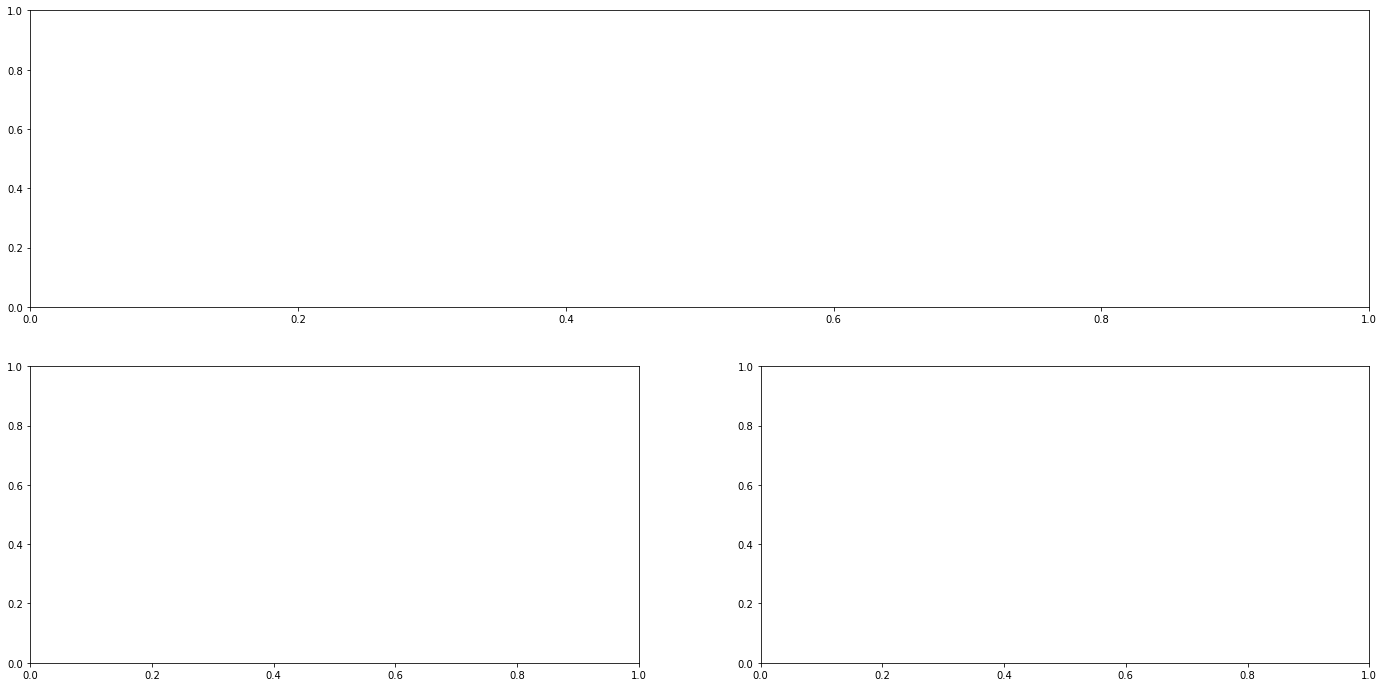

In [71]:
widgets.interactive(update_renovacao,df=fixed(df), limit=renovado)